<a href="https://colab.research.google.com/github/staaason/Labs_crypto/blob/main/lab1/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

import string
import matplotlib.pyplot as plt
import random
import re
from itertools import permutations
from math import log10

**Завдання 1.** Побудуйте гiстограму частот появи лiтер в текстi.

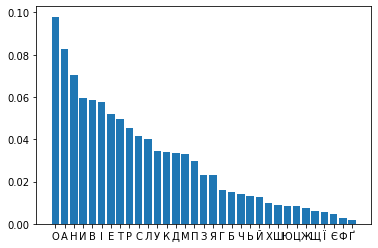

In [ ]:
def count_letters(files):
    frequency = {}
    for file_path in files:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        letters = re.sub(r'[^А-ЩЬЮЯЄІЇҐ]','',content.upper())
        total_letters = len(letters)
        for letter in letters:
            if letter in frequency:
                frequency[letter] += 1
            else:
                frequency[letter] = 1
        for letter in frequency:
            frequency[letter] /= total_letters
    return sorted(frequency.items(), key=lambda x: x[1], reverse=True)
files_path = ['book1.txt', 'book2.txt', 'book3.txt', 'book4.txt']
frequency = count_letters(files_path)

plt.bar([x[0] for x in frequency], [x[1] for x in frequency])
plt.show()

Відповідно до цієї діаграми, що взята з habr  видно, що діаграми майже ідентичні, якщо взяти більше даних


**Завдання 2.** Реалiзуйте алгоритм шифрування Вiженера.

In [ ]:

def vigenere_encrypt(plaintext, key):
    if(plaintext.isalpha):
        alphabet = 'абвгґдеєжзиіїйклмнопрстуфхцчшщьюя'.upper()
        key = key.upper()
    else:
        alphabet = 'абвгґдеєжзиіїйклмнопрстуфхцчшщьюя'.lower()
        key = key.lower()
      
    n = len(alphabet)
    k = len(key)
    ciphertext = ''
    for i in range(len(plaintext)):
        pi = alphabet.find(plaintext[i])
        ki = alphabet.find(key[i % k])
        ci = (pi + ki) % n
        ciphertext += alphabet[ci]
    return ciphertext


def vigenere_decrypt(ciphertext, key):
  if(ciphertext.isalpha):
      alphabet = 'абвгґдеєжзиіїйклмнопрстуфхцчшщьюя'.upper()
      key = key.upper()
  else:
      ciphertext = 'абвгґдеєжзиіїйклмнопрстуфхцчшщьюя'.lower()
      key = key.lower()
  key_len = len(key)
  new_key = (key * (len(ciphertext) // key_len + 1))[:len(ciphertext)]
  plaintext = ''
  for i in range(len(ciphertext)):
      k = alphabet.index(new_key[i])
      c = alphabet.index(ciphertext[i])
      p = (c - k) % len(alphabet)
      plaintext += alphabet[p]
  return plaintext


def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation + '0123456789')
    text = text.translate(translator)
    text = text.replace(' ', '')
    return ''.join(ch for ch in text if ch.isalnum()).lower()


plain_text = "ДОБРОГОВЕЧОРАМИЗУКРАЇНИ"
fixed_text = remove_punctuation(plain_text)
plaintext = re.sub(r'[^А-ЩЬЮЯЄІЇҐ]', '', fixed_text.upper(), flags=re.U)
key = "ЛЮБЛЮТЕБЕ".upper()
cipher_text = vigenere_encrypt(plaintext, key)
print(cipher_text)
decrypted_text = vigenere_decrypt(cipher_text, key)
print(decrypted_text)
print(fixed_text.upper() == decrypted_text)

РМВВМХФГЇЗМСЛКЯЛФРВЮЙЯЖ
ДОБРОГОВЕЧОРАМИЗУКРАЇНИ
True


**Завдання 3** Проведiть криптоаналiз шифру Вiженера i розшифруйте запропонований крипто-
текст, не знаючи секретного ключа  

Реалізацію була взята з [Cryptanalysis of the Vigenere Cipher](http://practicalcryptography.com/cryptanalysis/stochastic-searching/cryptanalysis-vigenere-cipher-part-2/)  
Дані триграм, квадраграм було отримано шляхом читання та підрахунку з файлом з данними на 14 гб [CC-100: Monolingual Datasets from Web Crawl Data](https://data.statmt.org/cc-100/), але я брав тільки 2 гб з файлу, бо читання цілого файлу займало 3 години  


In [ ]:
class ngram_score(object):
    
    def __init__(self, ngramfile, sep=' '):
        
        self.ngrams = {}
        with open(ngramfile, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.replace("\t", " ")
                values = line.split(sep)
                key, count = values[0], values[1]
                self.ngrams[key] = int(count)
        self.L = len(key)
        self.N = sum(self.ngrams.values())
        for key in self.ngrams.keys():
            self.ngrams[key] = log10(float(self.ngrams[key]) / self.N)
        self.floor = log10(0.01 / self.N)

    def score(self,text):
        score = 0
        ngrams = self.ngrams.__getitem__
        for i in range(len(text)-self.L+1):
            if text[i:i+self.L] in self.ngrams: score += ngrams(text[i:i+self.L])
            else: score += self.floor          
        return score


cipher_text = vigenere_encrypt(plaintext, key)
qgram = ngram_score('/content/uk_quadragrams.txt')
trigram = ngram_score('/content/uk_triagrams.txt')
ctext = cipher_text
ctext = re.sub(r'[^А-ЩЬЮЯЄІЇҐ]','',ctext.upper())
class nbest(object):
    def __init__(self,N=1000):
        self.store = []
        self.N = N
        
    def add(self,item):
        self.store.append(item)
        self.store.sort(reverse=True)
        self.store = self.store[:self.N]
    
    def __getitem__(self,k):
        return self.store[k]

    def __len__(self):
        return len(self.store)


N=100
for KLEN in range(3, 25):
    rec = nbest(N)

    for i in permutations('АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯ',3):
        key = ''.join(i) + 'А'*(KLEN-len(i))
        pt = vigenere_decrypt(ctext, key)
        score = 0
        for j in range(0,len(ctext),KLEN):
            score += trigram.score(pt[j:j+3])
        rec.add((score,''.join(i),pt[:30]))

    next_rec = nbest(N)
    for i in range(0,KLEN-3):
        for k in range(N):
            for c in 'АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯ':
                key = rec[k][1] + c
                fullkey = key + 'А'*(KLEN-len(key))
                pt = vigenere_decrypt(ctext, fullkey)
                score = 0
                for j in range(0,len(ctext),KLEN):
                    score += qgram.score(pt[j:j+len(key)])
                next_rec.add((score,key,pt[:30]))
        rec = next_rec
        next_rec = nbest(N)
    bestkey = rec[0][1]
    pt = vigenere_decrypt(ctext, bestkey)
    bestscore = qgram.score(pt)
    for i in range(N):
        pt = vigenere_decrypt(ctext, rec[i][1])
        score = qgram.score(pt)
        if score > bestscore:
            bestkey = rec[i][1]
            bestscore = score      
            
    print('Best score:', bestscore, 'key length', KLEN,':"'+ bestkey +'",', vigenere_decrypt(ctext, bestkey))

Best score: -136.79219872581334 key length 3 :"ЛЮБ", ДОБРОФЗДІЧОРАМЮАЦПРАЇНИ
Best score: -113.8862651543438 key length 4 :"ЮЗКС", ТЄСКОМИЛКАВАНДОЧЦІСИЛУЧ
Best score: -128.99679455027183 key length 5 :"ЮЕЛЇТ", ТИРУЧЧОСАРОЛАВИНОДУЗЛЦЦ
Best score: -117.40596056835929 key length 6 :"ОЮТСЕА", ВОЙКИХЕДУСИСЬМИЧОРНАФІВ
Best score: -106.94805108860534 key length 7 :"ЦЯФАИЮЬ", ЧНІВЕЧЧИЙОМІННЕМАРХАМЕЗ
Best score: -104.38513538608942 key length 8 :"ЬИЙСЯКИЬ", УЕТКНІКЕЛЯГАМАТОЧИТИКОЮ
Best score: -91.44876945403138 key length 9 :"ЛЮБЛЮТЕКЕ", ДОБРОГОТЕЧОРАМИЗИКРАЇНИ
Best score: -89.4258762513012 key length 10 :"ГМЬЦИДТГХЗ", НАДЗЕРВАРАЙДОСТИВНИТИМІ
Best score: -81.08699604885759 key length 11 :"ИЧХКЧДКЛЮФК", ИТИСТРИСКОВІСТОСПЕРАТОЮ
Best score: -79.17717164098605 key length 12 :"ҐДКЙЕЯЙЩШРМЕ", МІСТИЦІЄНТАЛІЗОВОСТВОЇХ
Best score: -77.63187798826225 key length 13 :"КЬЛВКЛЗГУХЮАЦ", ЕПРАВИЛАТНОСТАВАТЕРТИЗМ
Best score: -76.56869455092708 key length 14 :"ИШЙХЩКЩТЧЧПҐЬЦ", ИСТИРІШКОЛЬНОСТРІШЕННИК
Best score: -